### Polynomial Regression Task

##### 한국인 수익 예측
- id : 식별 번호
- year : 조사 년도
- wave : 2005년 wave 1위부터 2018년 wave 14위까지
- region: 1)서울 2)경기 3)경남 4)경북 5)충남 6)강원 & 충북 7)전라 & 제주
- income: 연간 수입 M원(백만원.1100원=1USD)
- family_member: 가족 구성원 수
- gender: 1) 남성 2) 여성
- year_born: 태어난 년도
- education_level:1)무교육(7세 미만) 2)무교육(7세 이상) 3)초등학교 4)중학교 5)고등학교 6)대학 학위 8)MA 9)박사 학위
- marriage: 혼인상태. 1)해당없음(18세 미만) 2)혼인중 3)사망으로 별거중 4)별거중 5)미혼 6)기타
- religion: 1) 종교 있음 2) 종교 없음  
- occupation: 직종 코드, 별도 첨부
- company_size: 기업 규모
- reason_none_worker: 1)능력 없음 2)군 복무 중 3)학교에서 공부 중 4)학교 준비 5)직장인 7)집에서 돌보는 아이들 8)간호 9)경제 활동 포기 10)일할 의사 없음 11)기타

In [121]:
import pandas as pd

income_df = pd.read_csv('./datasets/korean_income.csv')
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  occupation          92857 non-null  object 
 12  company_size        92857 non-null  object 
 13  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 9.9+ MB


In [122]:
income_df.isna().sum()

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

In [123]:
income_df.duplicated().sum()

0

In [124]:
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,92857.0,4.365181e+07,2.619007e+07,10101.0,21771201.0,43220101.0,61900301.0,98000701.0
year,92857.0,2.011518e+03,4.011222e+00,2005.0,2008.0,2012.0,2015.0,2018.0
wave,92857.0,7.517958e+00,4.011222e+00,1.0,4.0,8.0,11.0,14.0
region,92857.0,3.691353e+00,2.058961e+00,1.0,2.0,3.0,5.0,7.0
income,92857.0,3.441122e+03,4.176325e+03,-232174.0,1140.0,2428.0,4695.0,468209.0
family_member,92857.0,2.484304e+00,1.292251e+00,1.0,1.0,2.0,3.0,9.0
gender,92857.0,1.296316e+00,4.566344e-01,1.0,1.0,1.0,2.0,2.0
year_born,92857.0,1.952957e+03,1.600607e+01,1910.0,1939.0,1952.0,1966.0,2002.0
education_level,92857.0,4.511895e+00,1.669887e+00,2.0,3.0,5.0,5.0,9.0
marriage,92857.0,1.679389e+00,1.103413e+00,0.0,1.0,1.0,2.0,9.0


In [125]:
income_df[income_df.income <= 0.0].shape[0]

232

In [126]:
income_df = income_df[income_df.income > 0.0]
income_df.shape[0]

92625

In [127]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92625 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92625 non-null  int64  
 1   year                92625 non-null  int64  
 2   wave                92625 non-null  int64  
 3   region              92625 non-null  int64  
 4   income              92625 non-null  float64
 5   family_member       92625 non-null  int64  
 6   gender              92625 non-null  int64  
 7   year_born           92625 non-null  int64  
 8   education_level     92625 non-null  int64  
 9   marriage            92625 non-null  int64  
 10  religion            92625 non-null  int64  
 11  occupation          92625 non-null  object 
 12  company_size        92625 non-null  object 
 13  reason_none_worker  92625 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 10.6+ MB


In [128]:
income_df.occupation.value_counts()

occupation
       33593
611    10026
941     2798
873     2595
312     2210
       ...  
824        2
113        1
828        1
122        1
12         1
Name: count, Length: 244, dtype: int64

In [129]:
income_df.loc[:, 'occupation'] = income_df.occupation.apply(lambda x: x.replace(' ', '0'))

In [130]:
income_df.occupation.value_counts()

occupation
0      33593
611    10026
941     2798
873     2595
312     2210
       ...  
824        2
113        1
828        1
122        1
12         1
Name: count, Length: 244, dtype: int64

In [131]:
income_df.company_size.value_counts()

company_size
      33592
1     28160
10     6905
3      6490
2      5599
7      3477
4      2668
5      1860
6      1346
9      1097
8      1030
11      393
99        8
Name: count, dtype: int64

In [132]:
income_df.loc[:, 'company_size'] = income_df.company_size.apply(lambda x: x.replace('99', '0'))
income_df.loc[:, 'company_size'] = income_df.company_size.apply(lambda x: x.replace(' ', '0'))

In [133]:
income_df.company_size.value_counts()

company_size
0     33600
1     28160
10     6905
3      6490
2      5599
7      3477
4      2668
5      1860
6      1346
9      1097
8      1030
11      393
Name: count, dtype: int64

In [134]:
income_df.reason_none_worker.value_counts()

reason_none_worker
      60513
10    19089
8      4265
9      2683
1      2495
7      1110
6      1074
4       699
5       326
11      237
99       75
3        51
2         7
0         1
Name: count, dtype: int64

In [135]:
income_df.loc[:, 'reason_none_worker'] = income_df.reason_none_worker.apply(lambda x: x.replace('99', '12'))
income_df.loc[:, 'reason_none_worker'] = income_df.reason_none_worker.apply(lambda x: x.replace(' ', '12'))

In [136]:
income_df.reason_none_worker.value_counts()

reason_none_worker
12    60588
10    19089
8      4265
9      2683
1      2495
7      1110
6      1074
4       699
5       326
11      237
3        51
2         7
0         1
Name: count, dtype: int64

In [137]:
(income_df[['company_size', 'occupation', 'reason_none_worker']] == 0).sum()

company_size          0
occupation            0
reason_none_worker    0
dtype: int64

In [138]:
income_df['target'] = income_df.income
income_df = income_df.drop(columns='income', axis=1)

In [139]:
income_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,target
0,10101,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,10101,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,10101,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,10101,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,10101,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,6,1,1967,5,1,1,874,1,12,11600.0
92853,98000701,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92854,98000701,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92855,98000701,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


In [140]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92625 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92625 non-null  int64  
 1   year                92625 non-null  int64  
 2   wave                92625 non-null  int64  
 3   region              92625 non-null  int64  
 4   family_member       92625 non-null  int64  
 5   gender              92625 non-null  int64  
 6   year_born           92625 non-null  int64  
 7   education_level     92625 non-null  int64  
 8   marriage            92625 non-null  int64  
 9   religion            92625 non-null  int64  
 10  occupation          92625 non-null  object 
 11  company_size        92625 non-null  object 
 12  reason_none_worker  92625 non-null  object 
 13  target              92625 non-null  float64
dtypes: float64(1), int64(10), object(3)
memory usage: 10.6+ MB


In [141]:
income_df[['company_size', 'occupation', 'reason_none_worker']] = income_df[['company_size', 'occupation', 'reason_none_worker']].astype('int16')
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92625 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92625 non-null  int64  
 1   year                92625 non-null  int64  
 2   wave                92625 non-null  int64  
 3   region              92625 non-null  int64  
 4   family_member       92625 non-null  int64  
 5   gender              92625 non-null  int64  
 6   year_born           92625 non-null  int64  
 7   education_level     92625 non-null  int64  
 8   marriage            92625 non-null  int64  
 9   religion            92625 non-null  int64  
 10  occupation          92625 non-null  int16  
 11  company_size        92625 non-null  int16  
 12  reason_none_worker  92625 non-null  int16  
 13  target              92625 non-null  float64
dtypes: float64(1), int16(3), int64(10)
memory usage: 9.0 MB


In [142]:
income_df

,id,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,target
0,10101,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,10101,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,10101,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,10101,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,10101,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,6,1,1967,5,1,1,874,1,12,11600.0
92853,98000701,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92854,98000701,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92855,98000701,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


In [143]:
income_df = income_df.drop(columns='id', axis=1)

In [144]:
income_df = income_df.reset_index(drop=True)
income_df

,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,target
0,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92620,2014,10,5,6,1,1967,5,1,1,874,1,12,11600.0
92621,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92622,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92623,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


In [145]:
from sklearn.preprocessing import StandardScaler
income_df = income_df[pd.Series(StandardScaler().fit_transform(income_df[['target']]).flatten()).between(-1.96, 1.96)]
income_df

,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,target
0,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92619,2013,9,7,6,1,1967,5,1,1,874,1,12,6194.0
92621,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92622,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92623,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


<Axes: >

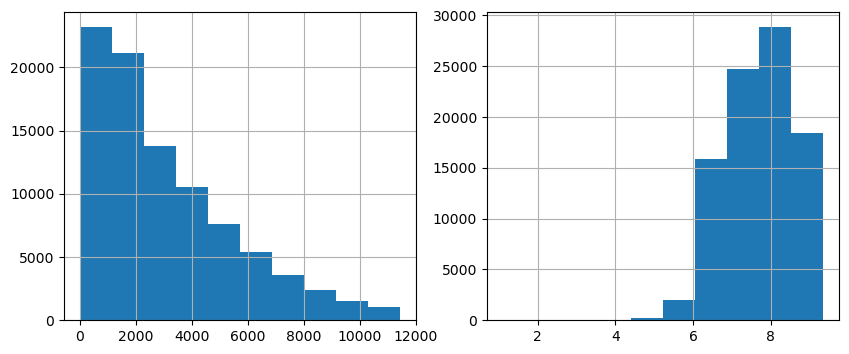

In [146]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
income_df.target.hist(ax=ax[0])
np.log1p(income_df.target).hist(ax=ax[1])

In [147]:
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,90204.0,2011.472241,4.006897,2005.0,2008.0,2012.0,2015.0,2018.0
wave,90204.0,7.472241,4.006897,1.0,4.0,8.0,11.0,14.0
region,90204.0,3.702907,2.059773,1.0,2.0,3.0,5.0,7.0
family_member,90204.0,2.448395,1.279360,1.0,1.0,2.0,3.0,9.0
gender,90204.0,1.303922,0.459952,1.0,1.0,1.0,2.0,2.0
year_born,90204.0,1952.658252,16.054399,1910.0,1939.0,1951.0,1966.0,2002.0
education_level,90204.0,4.462297,1.652562,2.0,3.0,5.0,5.0,9.0
marriage,90204.0,1.694892,1.110028,0.0,1.0,1.0,2.0,9.0
religion,90204.0,1.499468,0.531889,1.0,1.0,1.0,2.0,9.0
occupation,90204.0,393.281085,381.565806,0.0,0.0,314.0,741.0,9999.0


In [148]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def get_evaluation(y_test, prediction):
    MAE =  mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)

    print('MAE: {:.4f}, MSE: {:.2f}, RMSE: {:.2f}, MSLE: {:.2f}, RMSLE: {:.2f}, R2: {:.2f}'.format(MAE, MSE, RMSE, MSLE, RMSLE, R2))

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = income_df.iloc[:, :-1], income_df.target

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

# 로그 변환
y_train = np.log1p(y_train)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

prediction = linear_regression.predict(X_test)
get_evaluation(np.log1p(y_test), prediction)

MAE: 0.4005, MSE: 0.28, RMSE: 0.52, MSLE: 0.00, RMSLE: 0.06, R2: 0.64


##### 선형 회귀 분석은 최소값에 대한 제한이 없기 때문에 예측 값이 음수가 나올 수 있다.
1. feature에 음수 값이 있는 지 검사한다.
2. 전체 feature를 표준화(StandardScaler)해준다.
3. target의 최소값으로 음수를 변환해준다.
4. 로그로 변환

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

features, targets = income_df.iloc[:, :-1], income_df.target

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(poly_features, targets, test_size=0.2, random_state=0)

# scale = StandardScaler()

# X_train =  scale.fit_transform(X_train)
# X_test = scale.fit_transform(X_test)

# 로그 변환
y_train = np.log1p(y_train)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

prediction = linear_regression.predict(X_test)
# prediction[prediction < 0] = np.log1p(2.0)
get_evaluation(np.log1p(y_test), prediction)

MAE: 0.3556, MSE: 0.23, RMSE: 0.48, MSLE: 0.00, RMSLE: 0.06, R2: 0.70


In [160]:
import chardet

rawdata = open('./datasets/korean_job_code.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'utf-8'

In [163]:
import pandas as pd
job_code_df = pd.read_csv('./datasets/korean_job_code.csv')

display(income_df)
display(job_code_df)

,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,target
0,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92619,2013,9,7,6,1,1967,5,1,1,874,1,12,6194.0
92621,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92622,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92623,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


,job_code,job_title
0,0,알 수 없음
1,1,관리자
2,11,Senior public and corporate positions
3,111,"Assembly members, senior public officials and ..."
4,112,senior corporate executive
...,...,...
206,992,"Employees related to meter reading, collection..."
207,999,Other service related simple employees
208,10,군인
209,1011,Military officer


In [167]:
income_df = income_df.rename(columns={'occupation': 'job_code'})
income_df

,year,wave,region,family_member,gender,year_born,education_level,marriage,religion,job_code,company_size,reason_none_worker,target
0,2005,1,1,1,2,1936,2,2,2,0,0,8,614.0
1,2011,7,1,1,2,1936,2,2,2,0,0,10,896.0
2,2012,8,1,1,2,1936,2,2,2,0,0,10,1310.0
3,2013,9,1,1,2,1936,2,2,2,0,0,1,2208.0
4,2014,10,1,1,2,1936,2,2,2,0,0,10,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92619,2013,9,7,6,1,1967,5,1,1,874,1,12,6194.0
92621,2015,11,5,6,1,1967,5,1,1,874,1,12,8327.0
92622,2016,12,5,6,1,1967,5,1,1,874,1,12,7931.0
92623,2017,13,5,5,1,1967,5,1,1,874,1,12,8802.0


In [169]:
income_job_code_df = income_df.merge(job_code_df, on='job_code', how='inner')

In [170]:
income_job_code_df.job_title.value_counts()

job_title
알 수 없음                                                               33471
Crop cultivation worker                                               9971
Cleaners and environmental cleaners                                   2790
Car driver                                                            2546
Management-related clerk                                              2028
                                                                     ...  
Managers and other cultural and art related workers                     13
Statistics related clerk                                                12
Information and communication specialists and technical positions        7
Cargo train conductor and related employees                              7
Administrative and management support managerial positions               1
Name: count, Length: 155, dtype: int64